<a href="https://colab.research.google.com/github/jaynarayan94/All-ML-Code-And-Mini-Projects/blob/master/Multi_Class_Classification_using_Brainwave_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### From the Blog : [Multi-Class classification with Sci-kit learn & XGBoost: A case study using Brainwave data](https://medium.com/free-code-camp/multi-class-classification-with-sci-kit-learn-xgboost-a-case-study-using-brainwave-data-363d7fca5f69)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
np.random.seed(1234)

In [3]:
from google.colab import files

uploaded = files.upload()


Saving emotions.csv to emotions.csv
User uploaded file "emotions.csv" with length 51200113 bytes


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "emotions.csv" with length 51200113 bytes


In [0]:
import io
brainwave_df = pd.read_csv(io.StringIO(uploaded['emotions.csv'].decode('utf-8')))

In [6]:
brainwave_df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,2.15,29.5,-353.0,14.40,21.5,5.98,30.7,-343.0,14.7,27.9,3.17,32.2,-368.0,15.9,36.4,7.08,28.8,-359.0,17.3,19.6,-3.8300,-1.230,-10.80000,-0.363,-6.41,-1.03,-2.780,14.60,-1.540,-14.900000,...,30.90,-24.4,-24.4,30.90,-442.0,388.0,-197.0,-197.0,388.0,-564.0,500.00,-245.00,-245.00,500.00,-88.8,214.0,-88.8,-88.8,214.0,-606.0,509.000,-261.0,-261.0,509.000,-399.0,374.0,-185.00,-185.00,374.0,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,25.60,32.8,29.6,21.50,17.4,25.50,31.7,31.5,26.2,32.9,31.80,33.1,33.2,28.5,26.8,32.40,34.7,33.8,27.0,14.2,0.0342,1.100,-1.87000,-4.690,-15.40,-6.22,-0.328,-3.53,-6.980,-9.370000,...,-5.99,-19.1,-19.1,-5.99,163.0,-11.0,-10.7,-10.7,-11.0,117.0,-3.93,17.90,17.90,-3.93,112.0,-13.9,25.5,25.5,-13.9,225.0,-0.968,-27.7,-27.7,-0.968,97.4,-19.0,40.70,40.70,-19.0,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,7.75,30.1,-441.0,9.89,25.3,-68.90,25.3,-481.0,-65.4,20.0,79.80,31.0,-408.0,91.9,29.5,18.80,31.1,-335.0,32.2,19.9,76.6000,4.850,39.90000,75.300,5.27,-72.00,-0.843,-33.00,-82.000,-4.200000,...,585.00,-285.0,-285.0,585.00,-94.3,183.0,-110.0,-110.0,183.0,-133.0,200.00,-72.00,-72.00,200.00,-356.0,295.0,-158.0,-158.0,295.0,-251.0,255.000,-95.7,-95.7,255.000,-177.0,159.0,-48.80,-48.80,159.0,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,17.30,32.0,-148.0,20.40,22.8,13.20,31.5,-147.0,16.9,27.7,15.70,30.7,-142.0,20.7,22.8,13.60,32.2,-135.0,21.2,23.8,4.1500,0.556,-0.35400,3.460,-4.96,1.63,1.330,-5.83,-0.298,0.000777,...,249.00,-146.0,-146.0,249.00,359.0,-146.0,13.7,13.7,-146.0,119.0,-7.64,-7.17,-7.17,-7.64,-296.0,316.0,-218.0,-218.0,316.0,322.0,-113.000,38.4,38.4,-113.000,245.0,-61.9,-5.08,-5.08,-61.9,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,26.10,34.3,43.7,23.70,20.6,-3.87,34.1,43.7,-10.0,22.9,59.40,26.7,60.3,64.7,26.9,32.30,30.1,33.6,31.6,27.7,30.0000,0.276,-0.00677,33.700,-2.36,-33.30,7.640,-16.60,-41.100,-6.290000,...,18.30,-11.9,-11.9,18.30,159.0,-18.2,-25.6,-25.6,-18.2,194.0,32.70,-54.50,-54.50,32.70,154.0,26.4,-56.4,-56.4,26.4,252.0,9.940,-37.4,-37.4,9.940,172.0,15.9,-7.25,-7.25,15.9,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [7]:
brainwave_df.shape

(2132, 2549)

In [8]:
brainwave_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [9]:
Counter(brainwave_df['label'])

Counter({'NEGATIVE': 708, 'NEUTRAL': 716, 'POSITIVE': 708})

There are 2549 columns in the dataset and ‘label’ is the target column for our classification problem. All other columns like ‘mean_d_1_a’, ‘mean_d2_a’ etc are describing features of brainwave signal readings. Columns starting with the ‘fft’ prefix are most probably ‘Fast Fourier transforms’ of original signals. Our target column ‘label’ describes the degree of emotional sentiment.

As per Kaggle, here is the challenge: “Can we predict emotional sentiment from brainwave readings?”

Let’s first understand class distributions from column ‘label’:

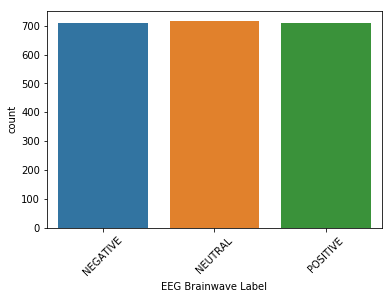

In [10]:
sns.countplot(brainwave_df['label']);
plt.xticks(rotation='45')
plt.xlabel('EEG Brainwave Label')
plt.show()

So, there are three classes, ‘POSITIVE’, ‘NEGATIVE’ & ‘NEUTRAL’, for emotional sentiment. From the bar chart, it is clear that class distribution is not skewed and it is a ‘multi-class classification’ problem with target variable ‘label’. We will try with different classifiers and see the accuracy levels.

In [11]:
# let's split depedent & Indepent Variables

x = brainwave_df.drop(['label'],axis=1)
y = brainwave_df['label']

x.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_710_b,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,2.15,29.5,-353.0,14.40,21.5,5.98,30.7,-343.0,14.7,27.9,3.17,32.2,-368.0,15.9,36.4,7.08,28.8,-359.0,17.3,19.6,-3.8300,-1.230,-10.80000,-0.363,-6.41,-1.03,-2.780,14.60,-1.540,-14.900000,...,247.0,30.90,-24.4,-24.4,30.90,-442.0,388.0,-197.0,-197.0,388.0,-564.0,500.00,-245.00,-245.00,500.00,-88.8,214.0,-88.8,-88.8,214.0,-606.0,509.000,-261.0,-261.0,509.000,-399.0,374.0,-185.00,-185.00,374.0,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,25.60,32.8,29.6,21.50,17.4,25.50,31.7,31.5,26.2,32.9,31.80,33.1,33.2,28.5,26.8,32.40,34.7,33.8,27.0,14.2,0.0342,1.100,-1.87000,-4.690,-15.40,-6.22,-0.328,-3.53,-6.980,-9.370000,...,151.0,-5.99,-19.1,-19.1,-5.99,163.0,-11.0,-10.7,-10.7,-11.0,117.0,-3.93,17.90,17.90,-3.93,112.0,-13.9,25.5,25.5,-13.9,225.0,-0.968,-27.7,-27.7,-0.968,97.4,-19.0,40.70,40.70,-19.0,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,7.75,30.1,-441.0,9.89,25.3,-68.90,25.3,-481.0,-65.4,20.0,79.80,31.0,-408.0,91.9,29.5,18.80,31.1,-335.0,32.2,19.9,76.6000,4.850,39.90000,75.300,5.27,-72.00,-0.843,-33.00,-82.000,-4.200000,...,-685.0,585.00,-285.0,-285.0,585.00,-94.3,183.0,-110.0,-110.0,183.0,-133.0,200.00,-72.00,-72.00,200.00,-356.0,295.0,-158.0,-158.0,295.0,-251.0,255.000,-95.7,-95.7,255.000,-177.0,159.0,-48.80,-48.80,159.0,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,17.30,32.0,-148.0,20.40,22.8,13.20,31.5,-147.0,16.9,27.7,15.70,30.7,-142.0,20.7,22.8,13.60,32.2,-135.0,21.2,23.8,4.1500,0.556,-0.35400,3.460,-4.96,1.63,1.330,-5.83,-0.298,0.000777,...,-273.0,249.00,-146.0,-146.0,249.00,359.0,-146.0,13.7,13.7,-146.0,119.0,-7.64,-7.17,-7.17,-7.64,-296.0,316.0,-218.0,-218.0,316.0,322.0,-113.000,38.4,38.4,-113.000,245.0,-61.9,-5.08,-5.08,-61.9,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,26.10,34.3,43.7,23.70,20.6,-3.87,34.1,43.7,-10.0,22.9,59.40,26.7,60.3,64.7,26.9,32.30,30.1,33.6,31.6,27.7,30.0000,0.276,-0.00677,33.700,-2.36,-33.30,7.640,-16.60,-41.100,-6.290000,...,100.0,18.30,-11.9,-11.9,18.30,159.0,-18.2,-25.6,-25.6,-18.2,194.0,32.70,-54.50,-54.50,32.70,154.0,26.4,-56.4,-56.4,26.4,252.0,9.940,-37.4,-37.4,9.940,172.0,15.9,-7.25,-7.25,15.9,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


In [12]:
#Check for missing values.

x[x.isnull().any(axis=1)]

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_710_b,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b


As it is a ‘classification’ problem, we will follow the below conventions for each ‘classifier’ to be tried:
* We will use a ‘cross validation’ (in our case will use 10 fold cross validation) approach over the dataset and take average accuracy. This will give us a holistic view of the classifier’s accuracy.
* We will use a ‘Pipeline’ based approach to combine all pre-processing and main classifier computation. A ML ‘Pipeline’ wraps all processing stages in a single unit and act as a ‘classifier’ itself. By this, all stages become re-usable and can be put in forming other ‘pipelines’ also.
* We will track total time in building & testing for each approach. We will call this ‘time taken’.

## RandomForest Classifier
‘RandomForest’ is a tree & bagging approach-based ensemble classifier. It will automatically reduce the number of features by its probabilistic entropy calculation approach. Let’s see that:

In [13]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split

pl_random_forest = Pipeline(steps=[('random_forest',RandomForestClassifier())])
scores = cross_val_score(pl_random_forest,x,y,cv=10,scoring='accuracy')
print('Accuracy for Random forest Classifier : ',scores.mean())

Accuracy for Random forest Classifier :  0.976533848378247
CPU times: user 5.23 s, sys: 32.5 ms, total: 5.26 s
Wall time: 5.43 s


Accuracy is very good at 97.09% and ‘total time taken’ is quite short (5.13 s only).

For this classifier, no pre-processing stages like scaling or noise removal are required, as it is completely probability-based and not at all affected by scale factors.

## Logistic Regression Classifier
‘Logistic Regression’ is a linear classifier and works in same way as linear regression.

In [14]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pl_log_reg = Pipeline(steps=[('scalre',StandardScaler()),\
                             ('log_reg',LogisticRegression(multi_class='multinomial', solver='sag', max_iter=200))])

scores = cross_val_score(pl_log_reg,x,y,cv=10,scoring='accuracy')
print('Accuracy for Logisitic Regression : ',scores.mean())

Accuracy for Logisitic Regression :  0.9455778981517815
CPU times: user 3min 35s, sys: 813 ms, total: 3min 36s
Wall time: 3min 35s


We can see accuracy (94.51%) is lower than ‘RandomForest’ and ‘time taken’ is higher (3min 49s).

‘Logistic Regression’ is heavily affected by different value ranges across dependent variables, thus forces ‘feature scaling’. That’s why ‘StandardScaler’ from scikit-learn has been added as a preprocessing stage. It automatically scales features according to a Gaussian Distribution with zero mean & unit variance, and thus values for all variables range from -1 to +1.

The reason for high time taken is high-dimensionality and scaling time required. There are 2549 variables in the dataset and the coefficient of each one should be optimised as per the Logistic Regression process. Also, there is a question of multi-co-linearity. This means linearly co-related variables should be grouped together instead of considering them separately.

The presence of multi-col-linearity affects accuracy. So now the question becomes, “Can we reduce the number of variables, reduce multi-co-linearity, & improve ‘time taken?”

## Principal Component Analysis (PCA)
PCA can transform original low level variables to a higher dimensional space and thus reduce the number of required variables. All co-linear variables get clubbed together. Let’s do a PCA of the data and see what are the main PC’s:

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(x)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)

for index,var in enumerate(pca.explained_variance_ratio_):
    print('Explained Variance ratio by Principal Component ',(index+1)," : ",var)

Explained Variance ratio by Principal Component  1  :  0.3677256411753877
Explained Variance ratio by Principal Component  2  :  0.09553894257232605
Explained Variance ratio by Principal Component  3  :  0.08436069000482481
Explained Variance ratio by Principal Component  4  :  0.06085665181970161
Explained Variance ratio by Principal Component  5  :  0.047453732926251505
Explained Variance ratio by Principal Component  6  :  0.03082305251847158
Explained Variance ratio by Principal Component  7  :  0.02472162086092134
Explained Variance ratio by Principal Component  8  :  0.013753055070754958
Explained Variance ratio by Principal Component  9  :  0.012408702721188753
Explained Variance ratio by Principal Component  10  :  0.012103653572040905
Explained Variance ratio by Principal Component  11  :  0.009557100568565008
Explained Variance ratio by Principal Component  12  :  0.00916431101589643
Explained Variance ratio by Principal Component  13  :  0.008740057335090345
Explained Varian

In [16]:
pca.explained_variance_ratio_.sum()

0.819595861462996

We mapped 2549 variables to 20 Principal Components. From the above result, it is clear that first 10 PCs are a matter of importance. The total percentage of the explained variance ratio by the first 10 PCs is around 0.737 (0.36 + 0.095 + ..+ 0.012). Or it can be said that the first 10 PCs explain 82% variance of the entire dataset.

So, with this we are able to reduce 2549 variables to 10 variables. That’s a dramatic change, isn’t it? In theory, Principal Components are virtual variables generated from mathematical mapping. From a business angle, it is not possible to tell which physical aspect of the data is covered by them. That means, physically, that Principal Components don’t exist. But, we can easily use these PCs as quantitative input variables to any ML algorithm and get very good results.

For visualisation, let’s take the first two PCs and see how can we distinguish different classes of the data using a ‘scatterplot’.

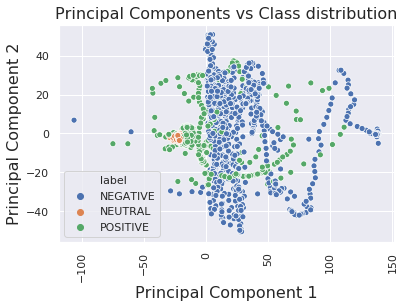

In [17]:
import seaborn as sns; sns.set()
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=brainwave_df['label'])
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

In [18]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
                                 ('pca',PCA(n_components=2)),
                                 ('log_reg',LogisticRegression(multi_class='multinomial',solver='sag',max_iter=200))])
scores = cross_val_score(pl_log_reg_pca,x,y,cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 2 Principal Components: ',scores.mean())

Accuracy for Logistic Regression with 2 Principal Components:  0.8151165203858428
CPU times: user 9.62 s, sys: 1.89 s, total: 11.5 s
Wall time: 6.69 s


Time taken ( 6.69 s) was reduced but accuracy (81.51%) decreased but its better with  components.

Now, let’s take all 10 PCs and run:

In [19]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
                                 ('pca',PCA(n_components=10)),
                                 ('log_reg',LogisticRegression(multi_class='multinomial',solver='sag',max_iter=200))])
scores = cross_val_score(pl_log_reg_pca,x,y,cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 10 Principal Components: ',scores.mean())

Accuracy for Logistic Regression with 10 Principal Components:  0.8770974282897483
CPU times: user 10.9 s, sys: 2 s, total: 12.9 s
Wall time: 7.65 s


We see an improvement in accuracy (87.80%) compared to 2 PC cases with a marginal increase in ‘time taken’.

So, in both cases we saw low accuracy compared to normal logistic regression, but a significant improvement in ‘time taken’.

Accuracy can be further tested with a different ‘solver’ & ‘max_iter’ parameter. We used ‘sag’ as ‘solver’ with L2 penalty and 200 as ‘max_iter’. These values can be changed to get a variable effect on accuracy.

Though ‘Logistic Regression’ is giving low accuracy, there are situations where it may be needed specially with PCA. In datasets with a very large dimensional space, PCA becomes the obvious choice for ‘linear classifiers’.

## Artificial Neural Network Classifier (ANN)
An ANN classifier is non-linear with automatic feature engineering and dimensional reduction techniques. ‘MLPClassifier’ in scikit-learn works as an ANN. But here also, basic scaling is required for the data. Let’s see how it works:



In [23]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

pl_mlp = Pipeline(steps=[('scaler',StandardScaler()),
                        ('mlp',MLPClassifier(hidden_layer_sizes=(1275,637)))])

scores = cross_val_score(pl_mlp,x,y,cv=10,scoring='accuracy')
print('Accuracy for ANN: ',scores.mean())

Accuracy for ANN:  0.9704436003153321
CPU times: user 19min 52s, sys: 5min 4s, total: 24min 57s
Wall time: 12min 52s


Accuracy (97.18%) is very good, though running time is high ( 7min 27s).

The reason for high ‘time taken’ is the rigorous training time required for neural networks, and that too with a high number of dimensions.

It is a general convention to start with a hidden layer size of 50% of the total data size and subsequent layers will be 50% of the previous one. In our case these are (1275 = 2549 / 2, 637 = 1275 / 2). The number of hidden layers can be taken as hyper-parameter and can be tuned for better accuracy. In our case it is 2.

## Linear Support Vector Machines Classifier (SVM)
We will now apply ‘Linear SVM’ on the data and see how accuracy is coming along. Here also scaling is required as a preprocessing stage.

In [24]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
                        ('svc',LinearSVC())])

scores = cross_val_score(pl_svm,x,y,cv=10,scoring='accuracy')
print('Accuracy for Linear SVM : ',scores.mean())

Accuracy for Linear SVM :  0.9643467083227542
CPU times: user 3min 4s, sys: 1.03 s, total: 3min 5s
Wall time: 3min 4s


Accuracy is coming in at 96.4% which is little less than ‘RandomForest’ or ‘ANN’. ‘time taken’ is 1min 19s which is in far better than ‘ANN’.

## Extreme Gradient Boosting Classifier (XGBoost)
XGBoost is a boosted tree based ensemble classifier. Like ‘RandomForest’, it will also automatically reduce the feature set. For this we have to use a separate ‘xgboost’ library which does not come with scikit-learn.

Let’s see how it works:

In [25]:
%%time

import xgboost as xgb

pl_xgb = Pipeline(steps=[('xgboost',xgb.XGBClassifier(objective='multi::softmax'))])

scores = cross_val_score(pl_xgb,x,y,cv=10)

print('Accuracy for XGBoost Classifier : ',scores.mean())

Accuracy for XGBoost Classifier :  0.9943615599489364
CPU times: user 14min 45s, sys: 294 ms, total: 14min 46s
Wall time: 14min 46s


Accuracy (99.4%) is exceptionally good, but ‘time taken’(15 min) is quite high. Nowadays, for complicated problems, XGBoost is becoming a default choice for Data Scientists for its accurate results. It has high running time due to its internal ensemble model structure. However, XGBoost performs well in GPU machines.

# Conclusion
### From all of the classifiers, it is clear that for accuracy ‘XGBoost’ is the winner. But if we take ‘time taken’ along with ‘accuracy’, then ‘RandomForest’ is a perfect choice. But we also saw how to use a simple linear classifier like ‘logistic regression’ with proper feature engineering to give better accuracy. Other classifiers don’t need that much feature engineering effort.
### It depends on the requirements, use case, and data engineering environment available to choose a perfect ‘classifier’.